In [5]:
import sys
from re import split
sys.path.append('../../../')
import os
import pandas as pd
import glob
import numpy as np
from impedance.circuits import Randles, CustomCircuit
import matplotlib.pyplot as plt
from impedance.plotting import plot_nyquist
from impedance import preprocessing

In [2]:
# direc=r'\\ADLERNAS\admin\BrianGerwe\Research\Data\fr-XAS\July18 Data\Versastat'
direc = r'\Data\Nov 19 frXAS'
print(os.getcwd())
all_files=glob.glob(os.getcwd() + direc + '\*.z')
all_files.sort()

f_name=all_files[0]
print(f_name)
freqs, Z= preprocessing.readZPlot(f_name)

C:\Users\shadd\OneDrive\Documents\Python\EIS
C:\Users\shadd\OneDrive\Documents\Python\EIS\Data\Nov 19 frXAS\OCV_EIS_Before1.z


In [3]:
# Some initial guess values for all circuits
d=266e-9 #thickness of Al2O3 mask
A=3e-3*3e-3-(6*1e-3*4e-6) #Area of mask minus area of electrode gates

R_elyte=32.8

C_if=1.4e-6
R_if=15

C_mask=9.7*8.854e-12*8.976e-6/266e-9 #permitivity=9.7 thickness=266 nm
R_mask=3.54e5*d/A
R_chem=1600
C_chem=2.23e-4

tg_init=10
Rg_init=1600

main_figsize=(10,7.5)
inset_figsize=(6,6)

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters


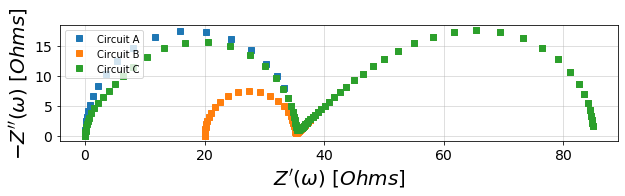

In [4]:
pred_freq = np.logspace(8, -3, num=100)

circA = 'p(R2-R3-G1,C1)'
initsA = [15, 20, 50, tg_init, 5e-7]

circB = 'p(R2,C1)-R3-G1'
initsB = [15, 5e-7, 20, 50, tg_init]

circC = 'p(C1,R2-p(R3,C2)-G1)'
initsC = [5e-7, 15, 20, 1e-6, 50, tg_init]

circD = 'p(C1,R2)-p(R3,C2)-G1'
initsD = [5e-7, 15, 20, 1e-6, 50, tg_init]

circE = 'p(R2-p(R3, C2)-G,C1)'
initsE = [15, 20, 1e-6, 50, tg_init, 8e-8]

circF = 'p(R2-p(R3, C2)-G,C1, R4)'
initsF = [15, 20, 1e-6, 50, tg_init, 8e-8, 10]

circG = 'p(R2-p(R3, C2)-G,C1)'
initsG = [25, 20+10, 1e-6, 50, tg_init, 8e-8]
# initsG = [25, 1/(1/20+1/10), 1e-6, 50, tg_init, 8e-8]


testA = CustomCircuit(circA, initial_guess = initsA)
predA = testA.predict(pred_freq,use_initial=True)

testB = CustomCircuit(circB, initial_guess = initsB)
predB = testB.predict(pred_freq,use_initial=True)

testC = CustomCircuit(circC, initial_guess = initsC)
predC = testC.predict(pred_freq,use_initial=True)

testD = CustomCircuit(circD, initial_guess = initsD)
predD = testD.predict(pred_freq,use_initial=True)

testE = CustomCircuit(circE, initial_guess = initsE)
predE = testE.predict(pred_freq,use_initial=True)

testF = CustomCircuit(circF, initial_guess = initsF)
predF = testF.predict(pred_freq,use_initial=True)

testG = CustomCircuit(circG, initial_guess = initsG)
predG = testG.predict(pred_freq,use_initial=True)

fig1 = plt.figure(figsize = main_figsize)
ax0 = fig1.add_subplot(211)
plot_nyquist(ax0, pred_freq, predA, fmt='s', label='Circuit A')
plot_nyquist(ax0, pred_freq, predB, fmt='s', label='Circuit B')
plot_nyquist(ax0, pred_freq, predC, fmt='s', label='Circuit C')
# plot_nyquist(ax0, pred_freq, predD, fmt='s', label='Circuit D')
# plot_nyquist(ax0, pred_freq, predE, fmt='s', label='Circuit E')
# plot_nyquist(ax0, pred_freq, predF, fmt='s', label='Circuit F')
# plot_nyquist(ax0, pred_freq, predG, fmt='s', label='Circuit G')
ax0.legend()